In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

/data/vision/phillipi/akumar01/miniconda3/envs/atari/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
env = gym.make_vec('ALE/MontezumaRevenge-v5', 32, 'sync', obs_type='grayscale', frameskip=4, repeat_action_probability=0, full_action_space=True)
envs = list(env.call('unwrapped'))

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [4]:
ram = []
obs, info = env.reset()
ram.append(np.stack([e.ale.getRAM() for e in envs]))
for i in range(100):
    env.step(np.random.randint(0, 18, 32))
    ram.append(np.stack([e.ale.getRAM() for e in envs]))

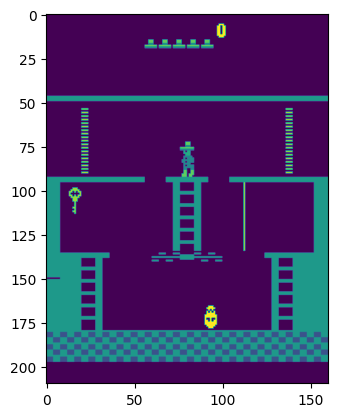

In [5]:
plt.imshow(obs[0])

In [43]:
ram = np.stack(ram, axis=1)

In [44]:
ram.shape

(101, 32, 128)

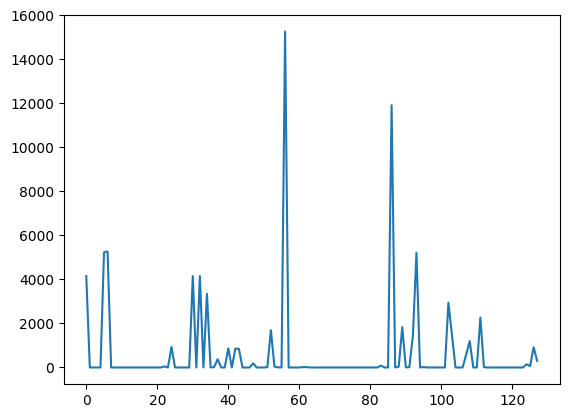

In [45]:
plt.plot(ram.var(axis=(0, 1)))

In [27]:
envs = list(env.call('unwrapped'))

In [4]:
env = gym.make_vec('ALE/MontezumaRevenge-v5', 4, 'sync', frameskip=(1, 30), repeat_action_probability=0.0, full_action_space=True)
envs = list(env.call('unwrapped'))
a = envs[0].ale.getRAM().copy()
print(envs[0].ale.getFrameNumber())
env.reset()
for i in range(100):
    env.step(np.random.randint(0, 18, 32))
b = envs[0].ale.getRAM().copy()
print(envs[0].ale.getFrameNumber())
envs = list(env.call('unwrapped'))
c = envs[0].ale.getRAM().copy()
print(envs[0].ale.getFrameNumber())
# print(a-a)
# print(b-a)
# print(c-a)

0
1613
1613


In [22]:
env = make_env(lib='gymnasium')

ValueError: Disable frame-skipping in the original env. Otherwise, more than one frame-skip will happen as through this wrapper

In [143]:
import env_atari
import buffers

In [151]:
%%time
env = env_atari.make_env('MontezumaRevenge', n_envs=32, lib='gymnasium')
buffer = buffers.Buffer(env, 2048) 
buffer.collect(RandomAgent(18), 1)

CPU times: user 1min 2s, sys: 166 ms, total: 1min 2s
Wall time: 1min 2s


In [150]:
buffer.rams.shape

torch.Size([32, 512, 128])

In [99]:
buffer.collect(RandomAgent(18), 1)

ValueError: not enough values to unpack (expected 5, got 4)

   sync SPS:  640
   
  async SPS: 2600
  
envpool SPS: 8100

In [23]:
env = envpool.make_gymnasium('BeamRider-v5', num_envs=16, full_action_space=True, reward_clip=True)

In [24]:
obs, info = env.reset()

In [25]:
for _ in range(500):
    obs, rew, term, trunc, info = env.step(np.random.randint(0, 18, 16))
    if (rew>0).any():
        print(rew)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
env = make_env_gymnasium(16, 'MontezumaRevenge', False)

In [44]:
obs, info = env.reset()

In [45]:
info

{'lives': array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
 '_lives': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 'episode_frame_number': array([11, 27, 30,  6,  4, 12, 29, 25, 12, 23, 25, 13, 20, 28, 18, 12]),
 '_episode_frame_number': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 'frame_number': array([11, 27, 30,  6,  4, 12, 29, 25, 12, 23, 25, 13, 20, 28, 18, 12]),
 '_frame_number': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True])}

In [304]:
api = wandb.Api()
# run = api.run("akarshkumar0101/egb-atari/3f22lzjl")
runs = api.runs('akarshkumar0101/egb-atari')

In [305]:
for run in runs:
    print(run.config['env_ids'][0], run.config['obj'], len(run.history(pandas=False, samples=2000)))

KungFuMaster rnd 1102
Asterix ext 1102
Qbert ext 1102
Skiing rnd 1102
NameThisGame ext 1102
PrivateEye ext 1102
BattleZone ext 1102
MontezumaRevenge rnd 1102
Asterix rnd 1102
Freeway ext 1102
NameThisGame rnd 1102
KungFuMaster ext 1102
CrazyClimber rnd 1102
Berzerk ext 1102
FishingDerby rnd 1102
Assault rnd 1102
Tennis rnd 1102
Enduro rnd 1102
Qbert rnd 1102
Pitfall ext 1102
Freeway rnd 1102
BankHeist ext 1102
BeamRider ext 1102
Jamesbond ext 1102
Pitfall rnd 1102
SpaceInvaders rnd 1102
Berzerk rnd 1102
CrazyClimber ext 1102
Atlantis rnd 1102
ChopperCommand ext 1102
Centipede rnd 1102
Atlantis ext 1102
IceHockey rnd 1102
Surround rnd 1102
DemonAttack ext 1102
Solaris ext 1102
RoadRunner ext 1102
Robotank ext 1102
Asteroids rnd 1102
MontezumaRevenge ext 1102
RoadRunner rnd 1102
Riverraid ext 1102
Gravitar rnd 1102
Krull ext 1102
DemonAttack rnd 1102
Gopher rnd 1102
Amidar rnd 1102
Breakout rnd 1102
BankHeist rnd 1102
MsPacman rnd 1102
Bowling rnd 1102
Centipede ext 1102
MsPacman ext 110

In [306]:
run = api.run("akarshkumar0101/egb-atari/3f22lzjl")

In [307]:
a = run.history(samples=2000)

Unable to load pandas, call history with pandas=False


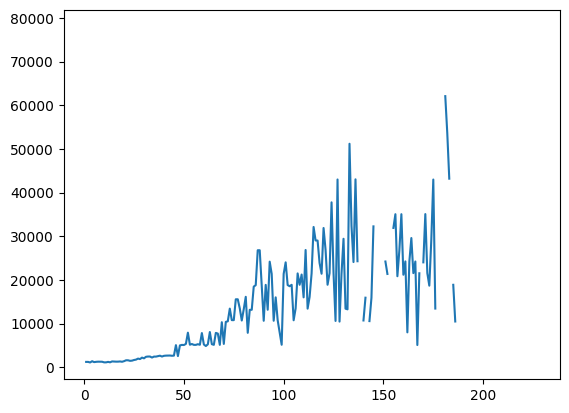

In [308]:
plt.plot([ai['returns_max/Pong_ret_traj'] for ai in a])

In [162]:
import buffers

In [170]:
%%time
env = make_env('MontezumaRevenge', n_envs=8, lib='gymnasium')
buffer_random = buffers.Buffer(env, 64)
agent_random = RandomAgent(18)

env = make_env('MontezumaRevenge', n_envs=8, lib='gymnasium')
buffer_eval = buffers.Buffer(env, 64)
agent_eval = RandomAgent(18)

CPU times: user 1.93 s, sys: 0 ns, total: 1.93 s
Wall time: 1.93 s


In [171]:
buffer_random.collect(agent_random, 1)

In [184]:
buffer_eval.collect(agent_eval, 1)

In [223]:
ram_var = buffer_random.rams.float().var(dim=(0, 1)).clamp(1, None)

In [224]:
a = buffer_eval.rams.float().var(dim=(0, 1))/ram_var

In [229]:
div_traj = (buffer_eval.rams.float().var(dim=1)/ram_var).mean(dim=0).mean().item()
div_buff = (buffer_eval.rams.float().var(dim=(0, 1))/ram_var).mean().item()
div_traj, div_buff

(0.3095785975456238, 0.41831329464912415)

In [254]:
batch = buffer_eval.generate_batch(8, 64)

In [255]:
print(batch['ram'].shape)
div_traj = (batch['ram'].float().var(dim=1)/ram_var).mean(dim=0).mean().item()
div_buff = (batch['ram'].float().var(dim=(0, 1))/ram_var).mean().item()
div_traj, div_buff

torch.Size([8, 64, 128])


(0.3095785975456238, 0.41831329464912415)

In [256]:
print(batch['obs'].shape)
div_traj = (batch['obs'].float().var(dim=1)).mean(dim=0).mean().item()
div_buff = (batch['obs'].float().var(dim=(0, 1))).mean().item()
div_traj, div_buff

torch.Size([8, 64, 1, 84, 84])


(85.26681518554688, 96.46015930175781)

In [275]:
i1, i2 = torch.randint(low=0, high=64, size=(2,))
obs1 = repeat(batch['obs'][:, i1], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
obs2 = repeat(batch['obs'][:, i2], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
d = loss_fn_alex(obs1, obs2).flatten()

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [287]:
i1, i2 = torch.randint(low=0, high=8*64, size=(2, 8))
obs1 = repeat(batch['obs'].flatten(0, 1)[i1], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
obs2 = repeat(batch['obs'].flatten(0, 1)[i2], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
d = loss_fn_alex(obs1, obs2).flatten()

In [297]:
a = buffer_eval.generate_batch(buffer_eval.env.num_envs, buffer_eval.n_steps)['obs']
b = buffer_eval.generate_batch(buffer_eval.env.num_envs, buffer_eval.n_steps)['obs']

In [301]:
torch.allclose(a,b)

True

In [ ]:
eval_diversity.calc

'MontezumaRevenge'

In [324]:
print(eval_diversity.calc_div_traj_ram(buffer_eval, 'MontezumaRevenge'))
print(eval_diversity.calc_div_buff_ram(buffer_eval, 'MontezumaRevenge'))
print(eval_diversity.calc_div_traj_pix(buffer_eval))
print(eval_diversity.calc_div_buff_pix(buffer_eval))
print(eval_diversity.calc_div_traj_lpips(buffer_eval))
print(eval_diversity.calc_div_buff_lpips(buffer_eval))

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
0.607555627822876
0.7540725469589233
85.26681518554688
96.46015930175781
0.043092645704746246
0.04385114833712578


In [3]:
import buffers
import eval_diversity
import utils

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/data/vision/phillipi/akumar01/miniconda3/envs/atari/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/vision/phillipi/akumar01/miniconda3/envs/atari/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /data/vision/phillipi/akumar01/miniconda3/envs/atari/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth


In [6]:
device = 'cuda'

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /data/vision/phillipi/akumar01/miniconda3/envs/atari/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth


In [42]:
env_ids = ['Hero', 'MontezumaRevenge', 'PrivateEye', 'Venture', 'Pitfall', 'BankHeist', 'Frostbite', 'Seaquest', 'MsPacman', 'Breakout', 'Pong']

In [43]:
objs = [None, 'ext', 'rnd']

In [44]:
data = []
for env_id in env_ids:
    for obj in objs:
        env = make_env(env_id, n_envs=32, device=device, lib='gymnasium')
        buffer = buffers.Buffer(env, 512, device=device)
        load_agent = None if obj is None else f'./data/egb-atari/specialist_{env_id}_{obj}_0/agent_000003050.pt'
        agent = utils.create_agent('cnn', 18, 4, load_agent=load_agent).to(device)
        for i in tqdm(range(1)):
            buffer.collect(agent, 4)
            data.append(eval_diversity.calc_div_traj_ram(buffer, env_id))
            data.append(eval_diversity.calc_div_buff_ram(buffer, env_id))
            data.append(eval_diversity.calc_div_traj_pix(buffer))
            data.append(eval_diversity.calc_div_buff_pix(buffer))
            data.append(eval_diversity.calc_div_traj_lpips(buffer))
            data.append(eval_diversity.calc_div_buff_lpips(buffer))
        # print(eval_diversity.calc_div_traj_ram(buffer, env_id))
        # print(eval_diversity.calc_div_buff_ram(buffer, env_id))
        # print(eval_diversity.calc_div_traj_pix(buffer))
        # print(eval_diversity.calc_div_buff_pix(buffer))
        # print(eval_diversity.calc_div_traj_lpips(buffer))
        # print(eval_diversity.calc_div_buff_lpips(buffer))

  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for Hero


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:50<00:00, 50.52s/it]

done



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for PrivateEye


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:42<00:00, 42.78s/it]

done



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for Venture


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:37<00:00, 37.95s/it]

done



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for BankHeist


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:38<00:00, 38.35s/it]

done



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for Frostbite


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:43<00:00, 43.64s/it]

done



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for Seaquest


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:39<00:00, 39.94s/it]

done



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for MsPacman


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:39<00:00, 39.13s/it]

done



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Creating RAM var for Pong


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:36<00:00, 36.44s/it]

done



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.00s/it]


In [46]:
a = np.array(data).reshape(len(env_ids), len(objs), 6)

In [47]:
a[0].shape

(3, 6)

Hero


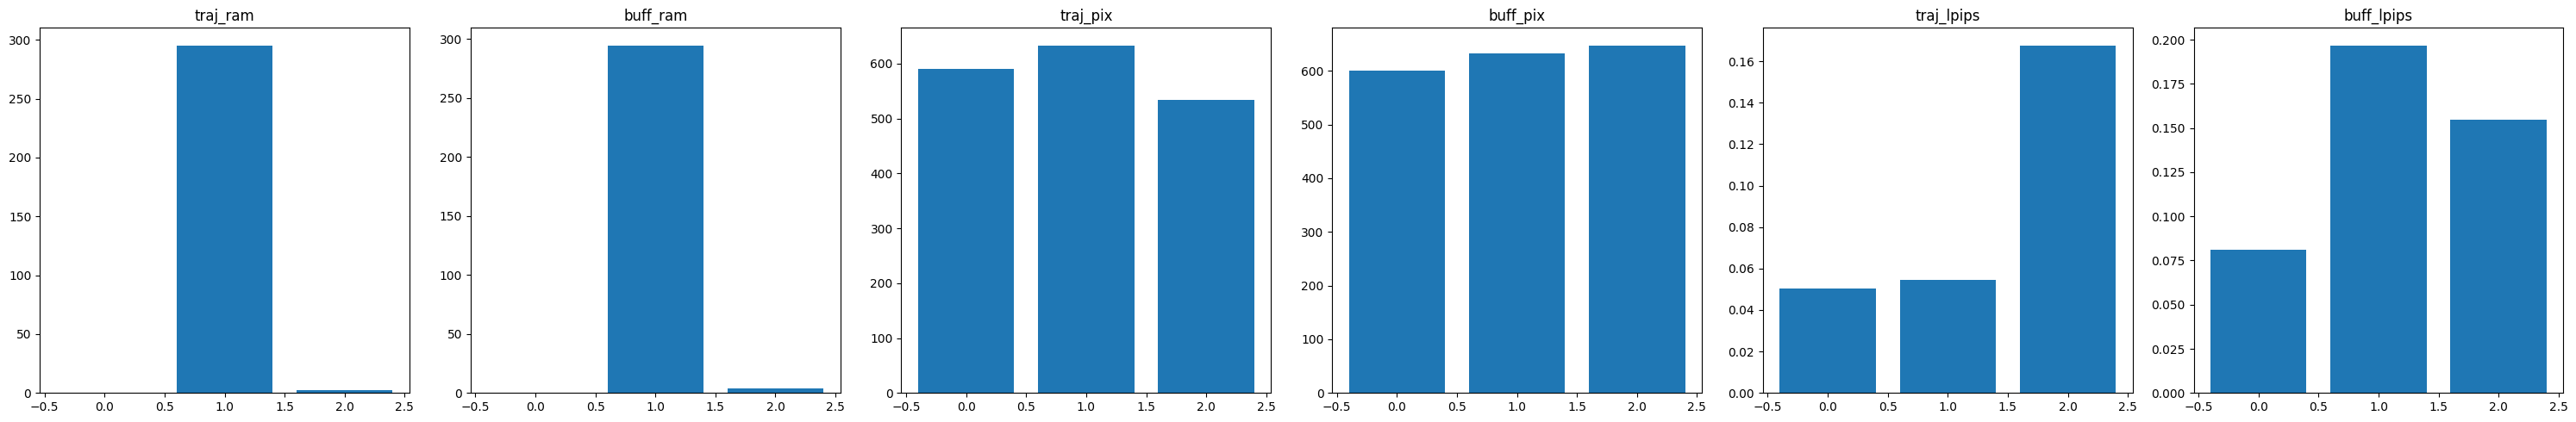

MontezumaRevenge


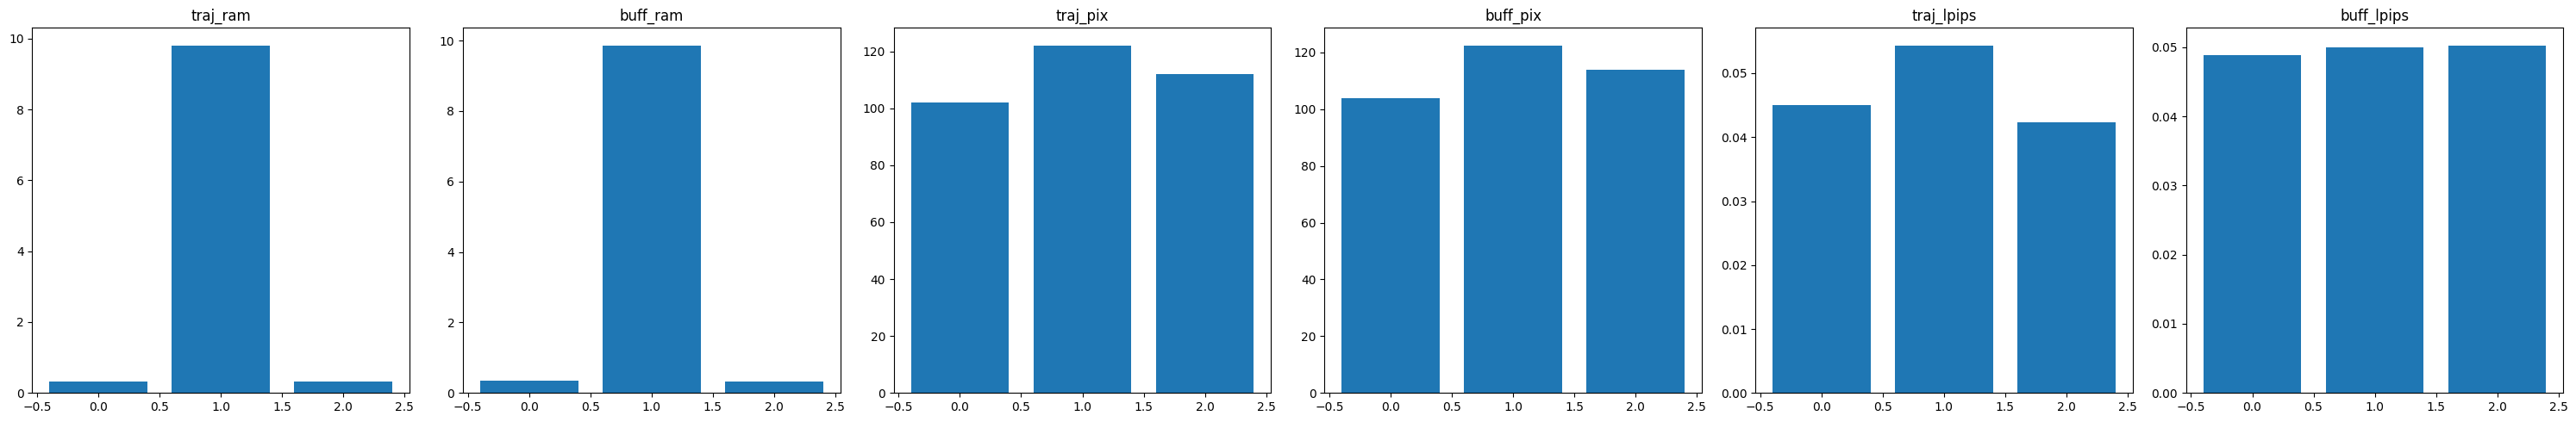

PrivateEye


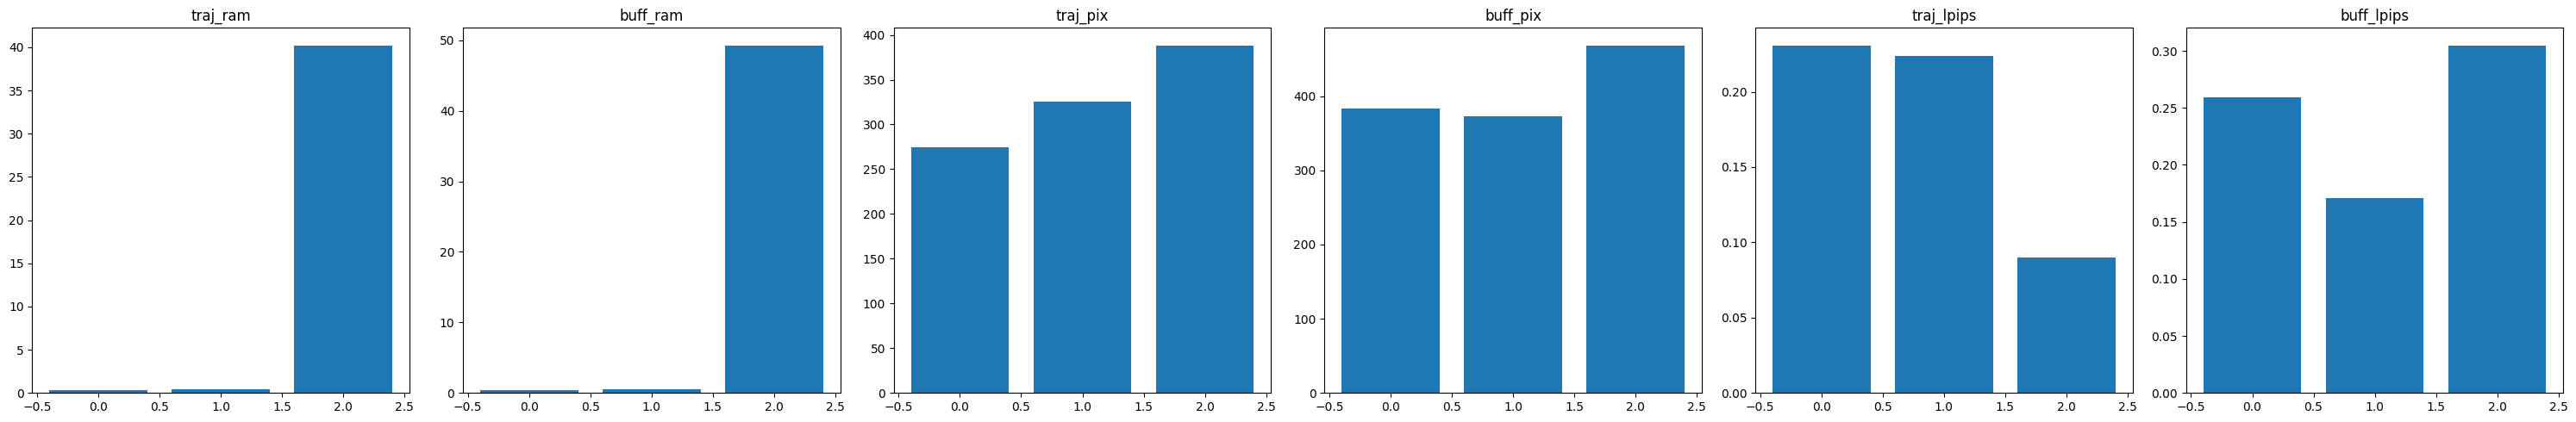

Venture


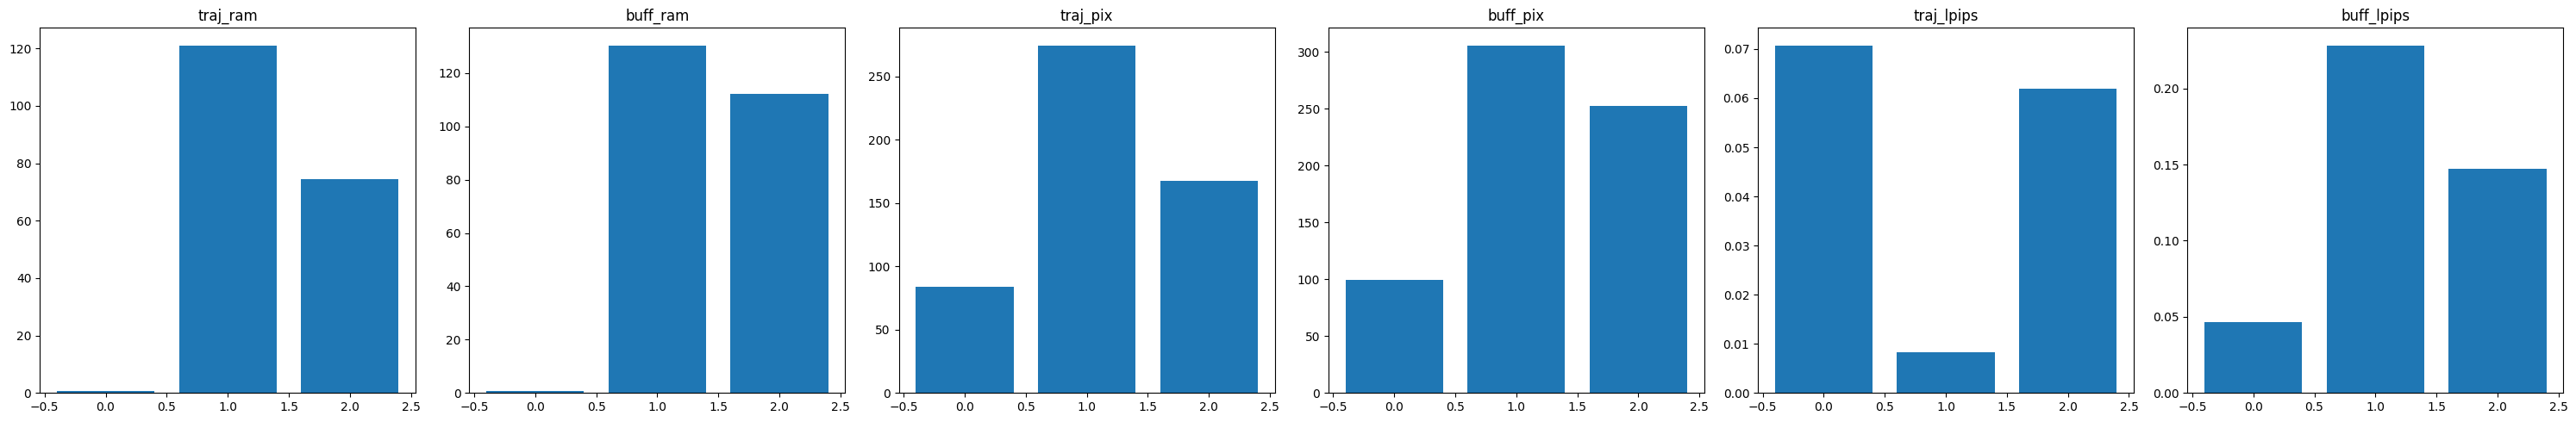

Pitfall


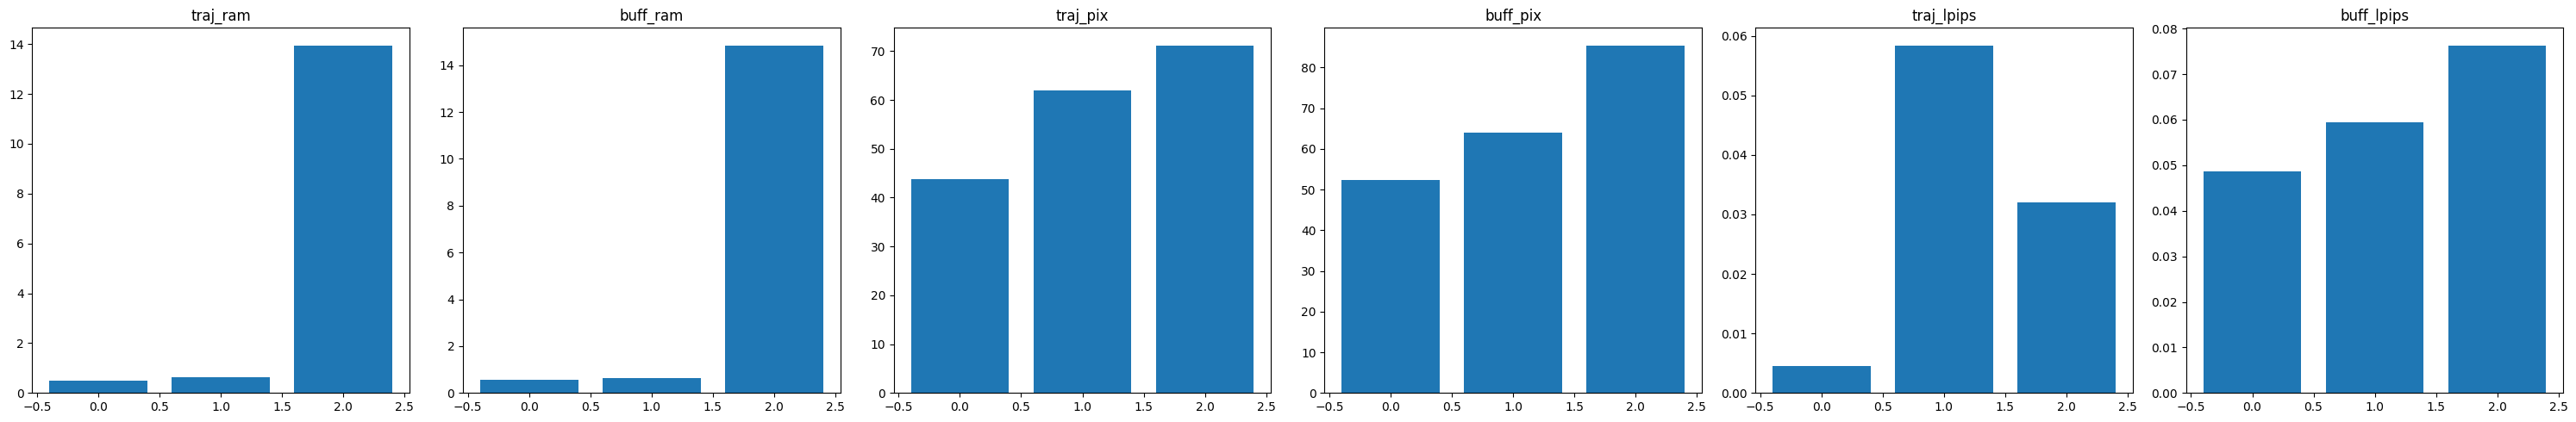

BankHeist


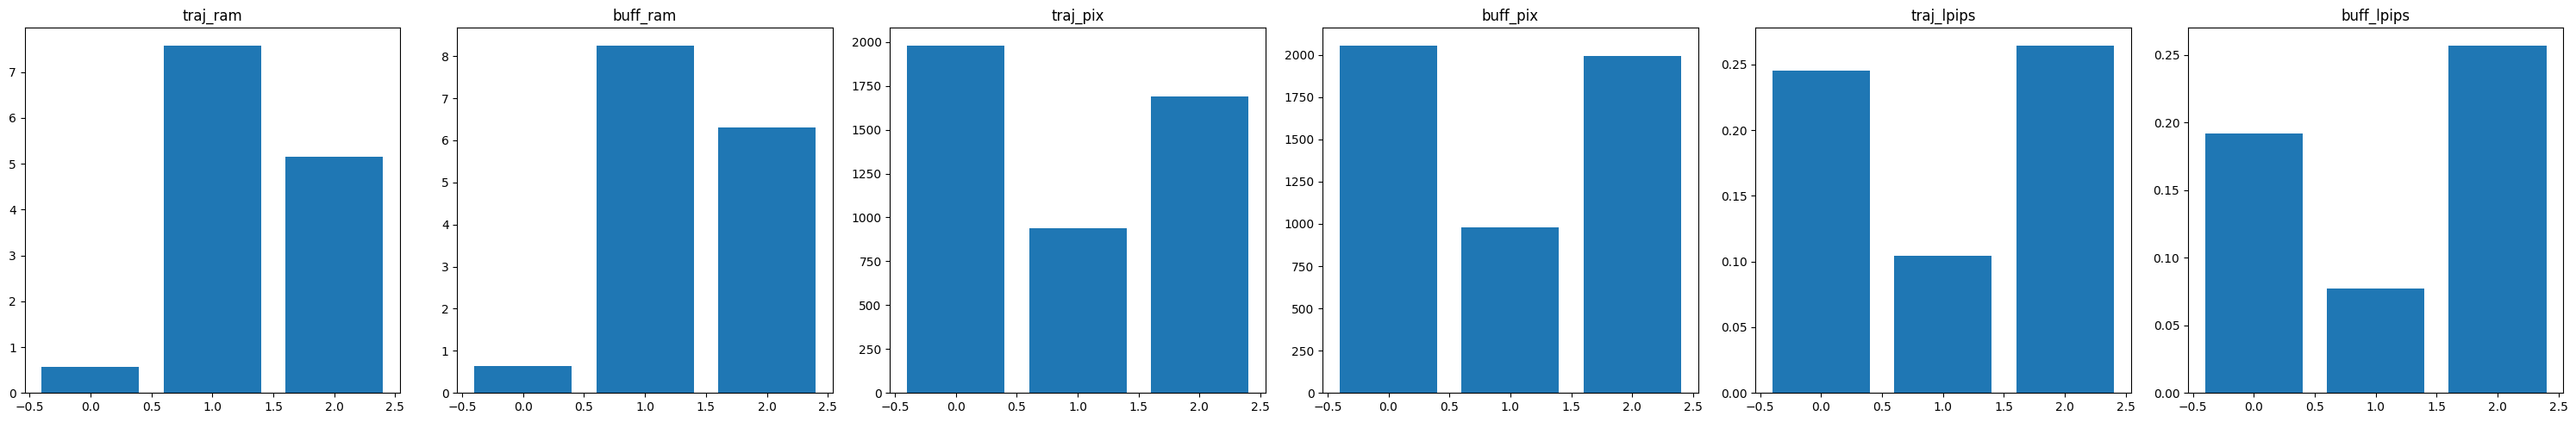

Frostbite


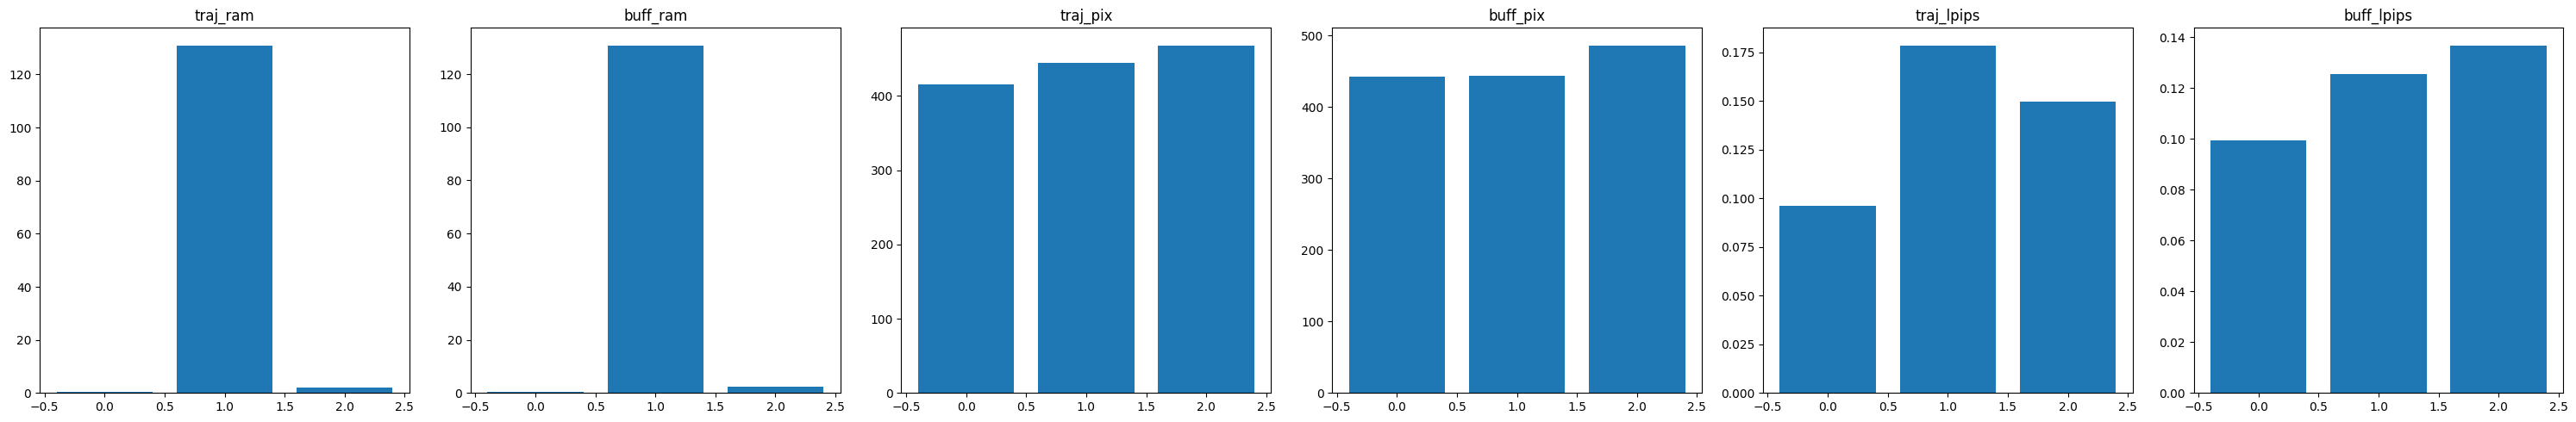

Seaquest


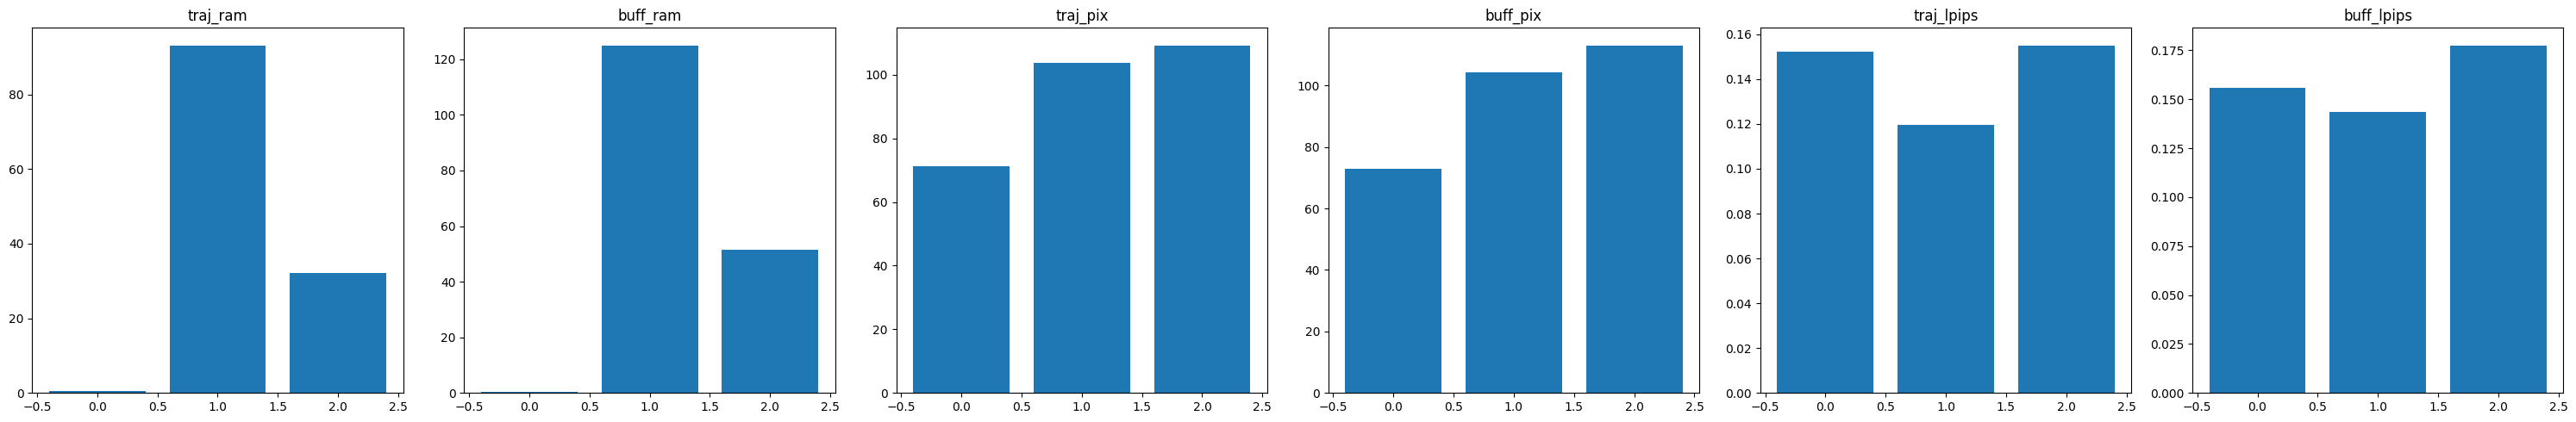

MsPacman


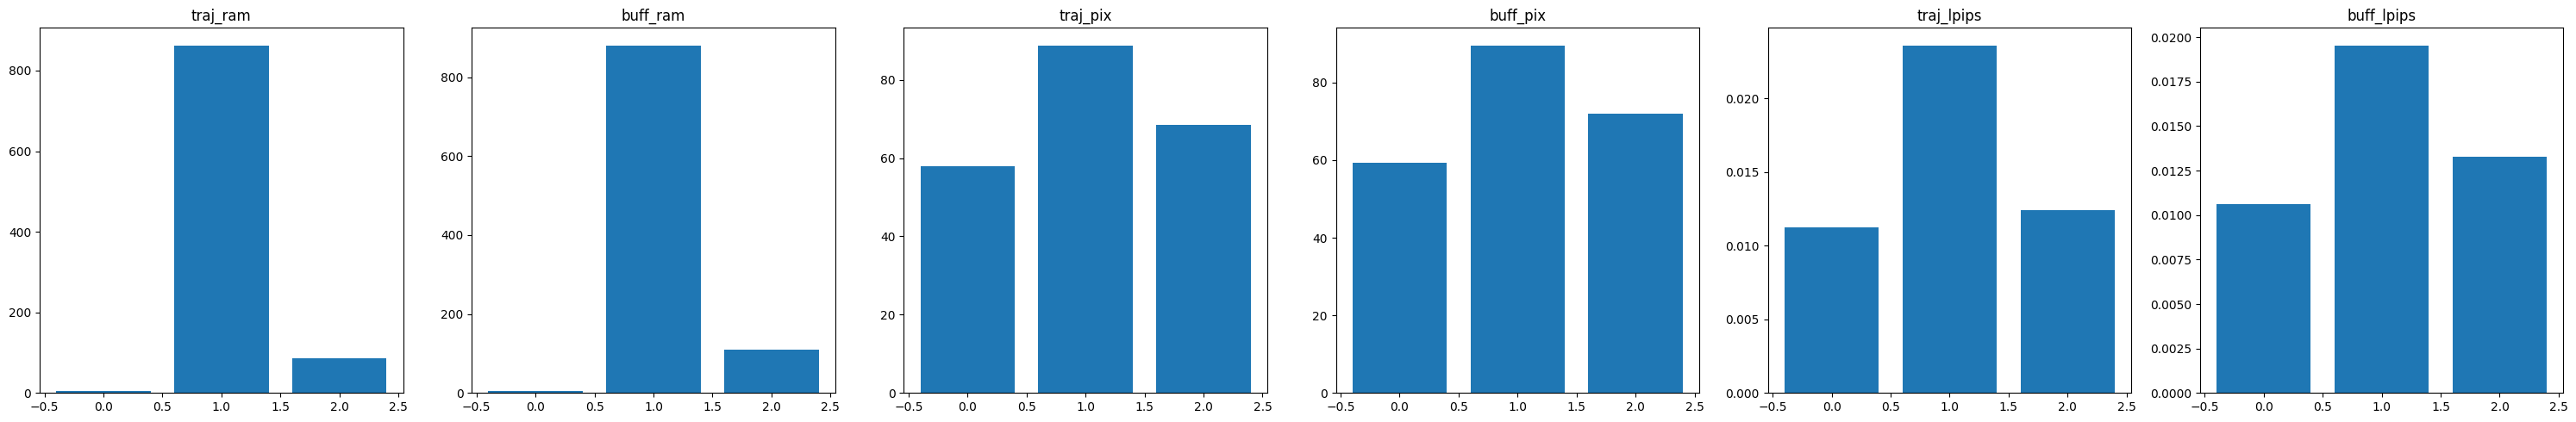

Breakout


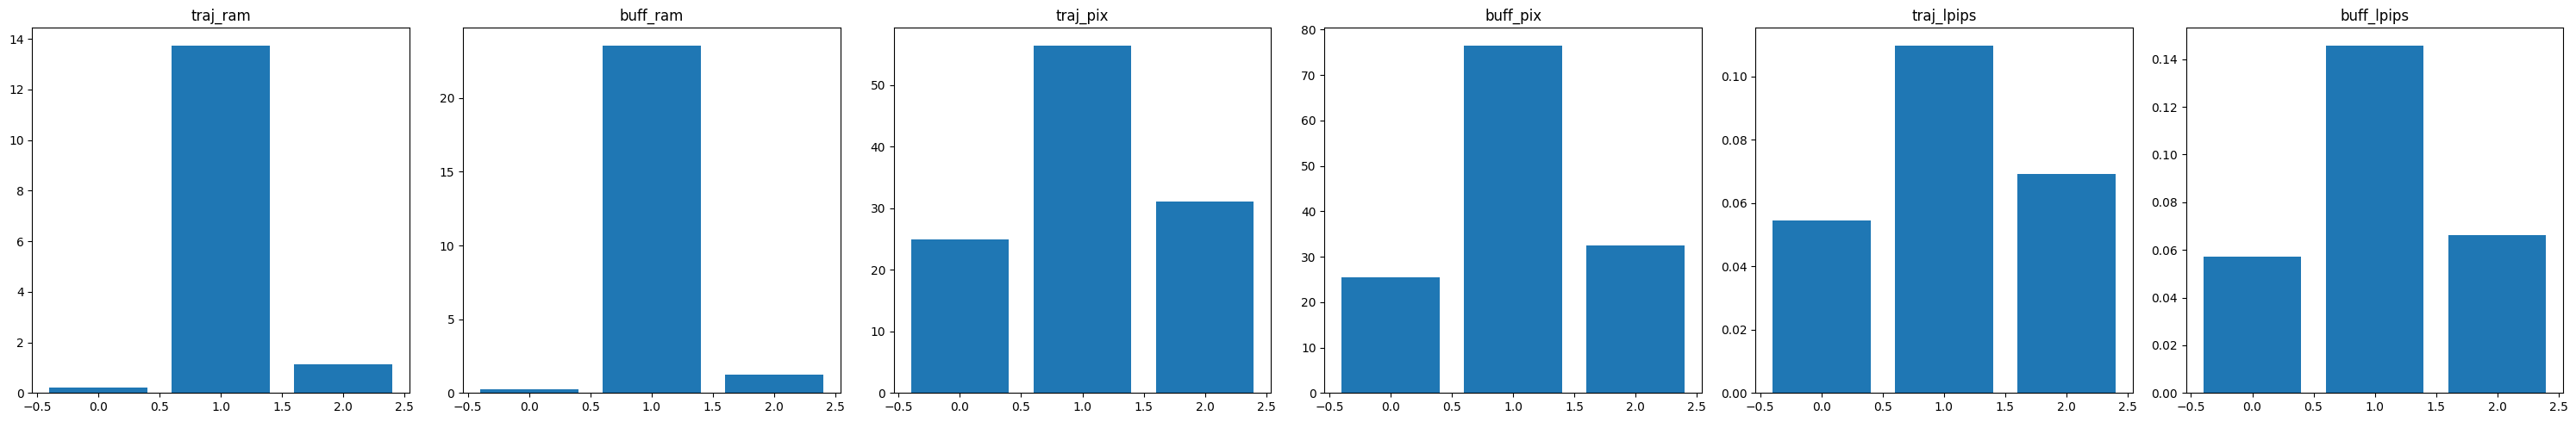

Pong


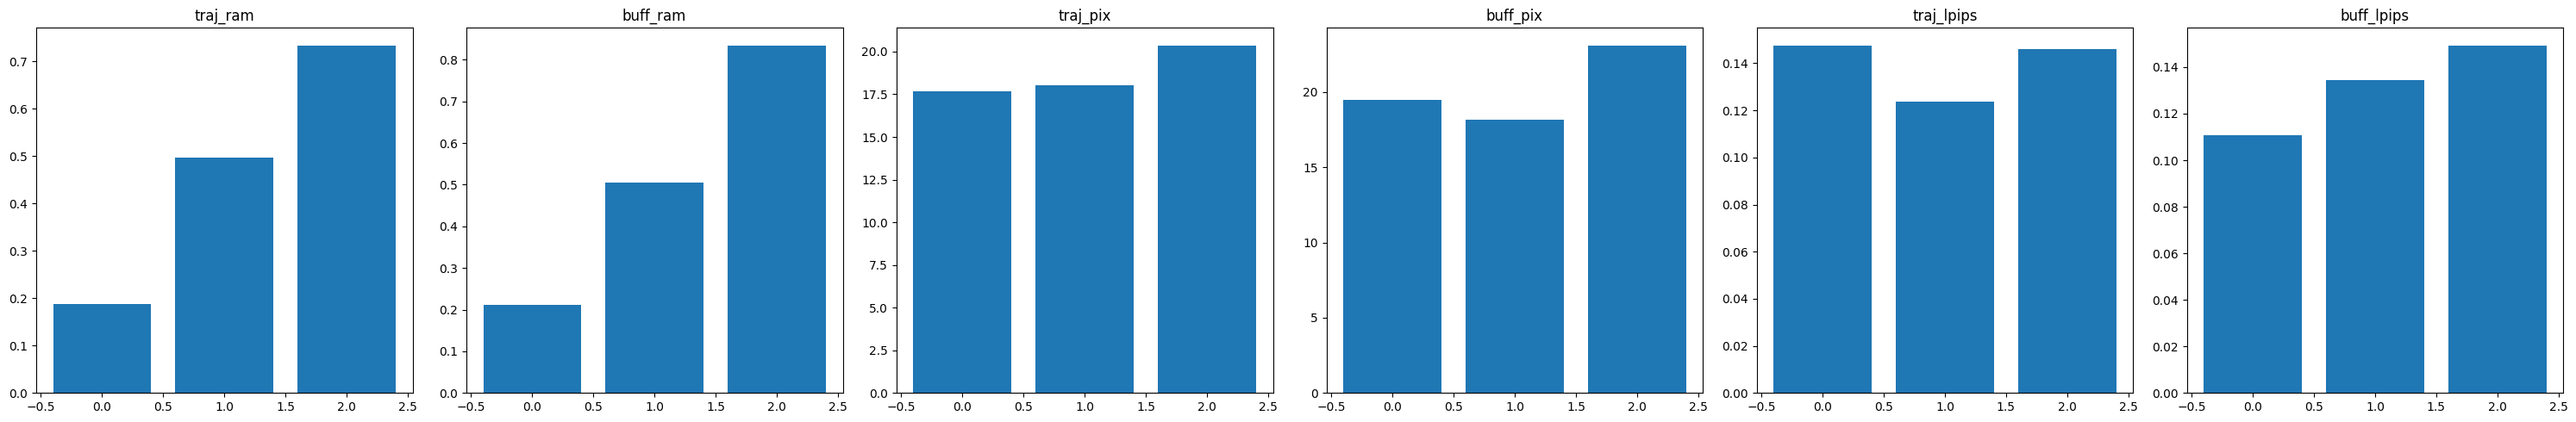

In [48]:
for j, env_id in enumerate(env_ids):
    print(env_id)
    plt.figure(figsize=(30, 5))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        plt.title(['traj_ram', 'buff_ram', 'traj_pix', 'buff_pix', 'traj_lpips', 'buff_lpips'][i])
        plt.bar(np.arange(3), a[j][:, i])
    plt.tight_layout()
    plt.show()

MontezumaRevenge


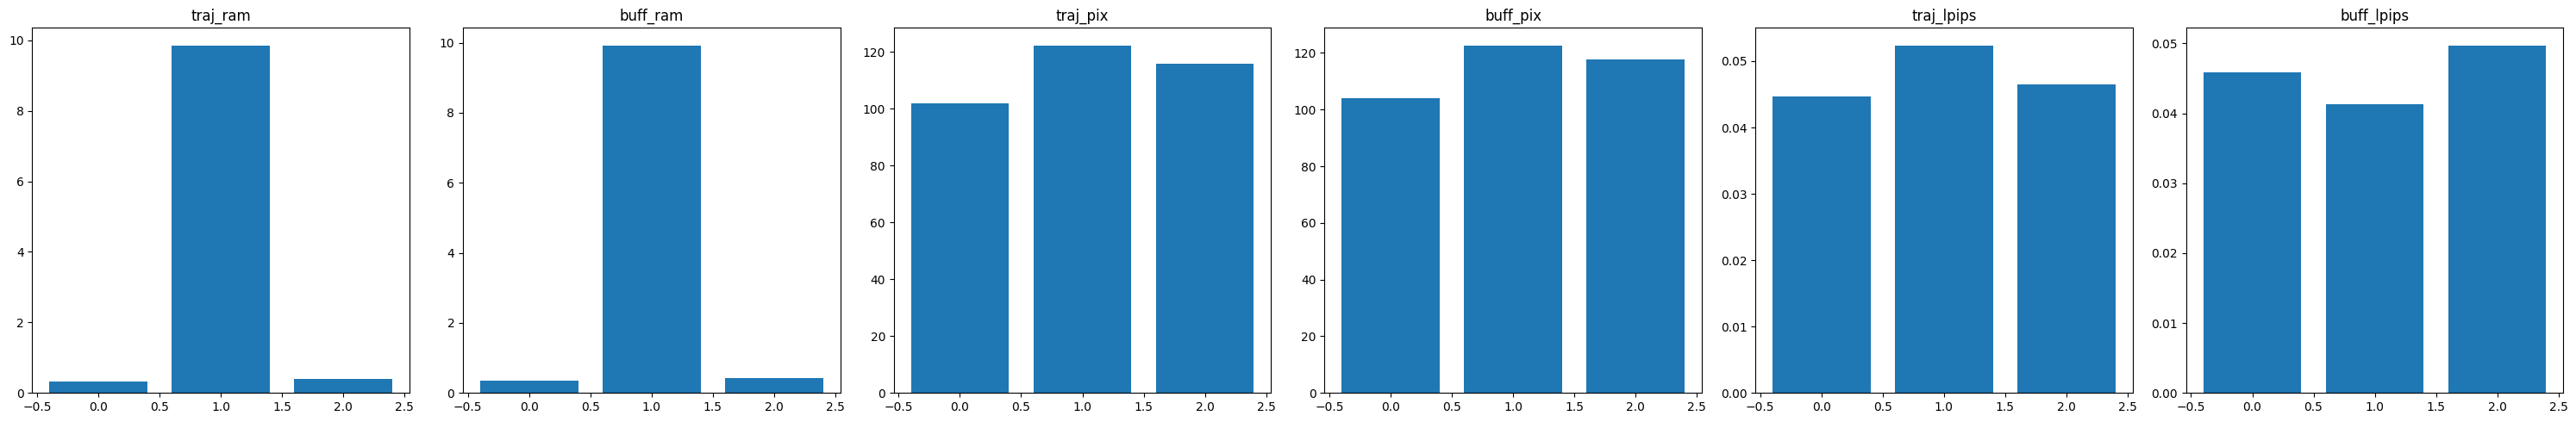

Pitfall


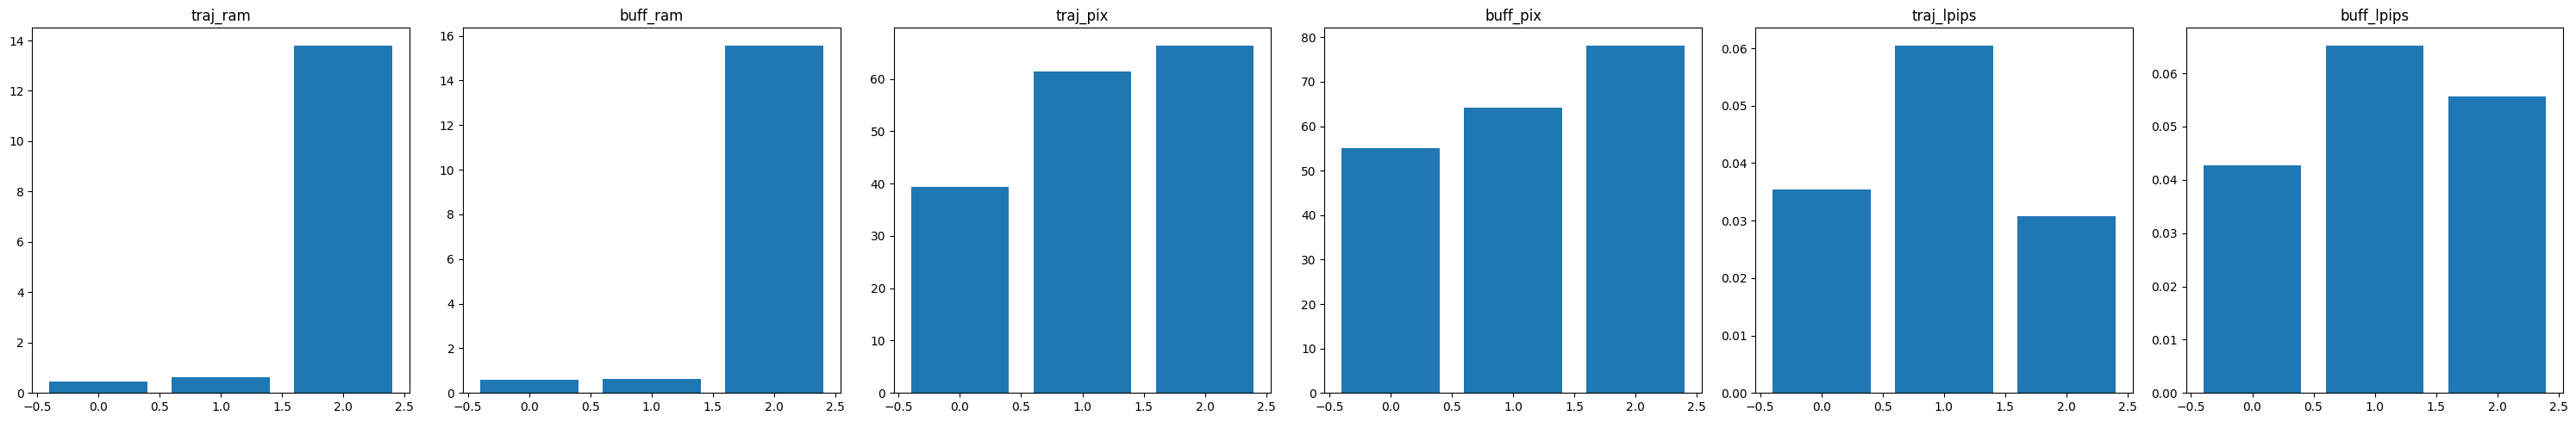

Breakout


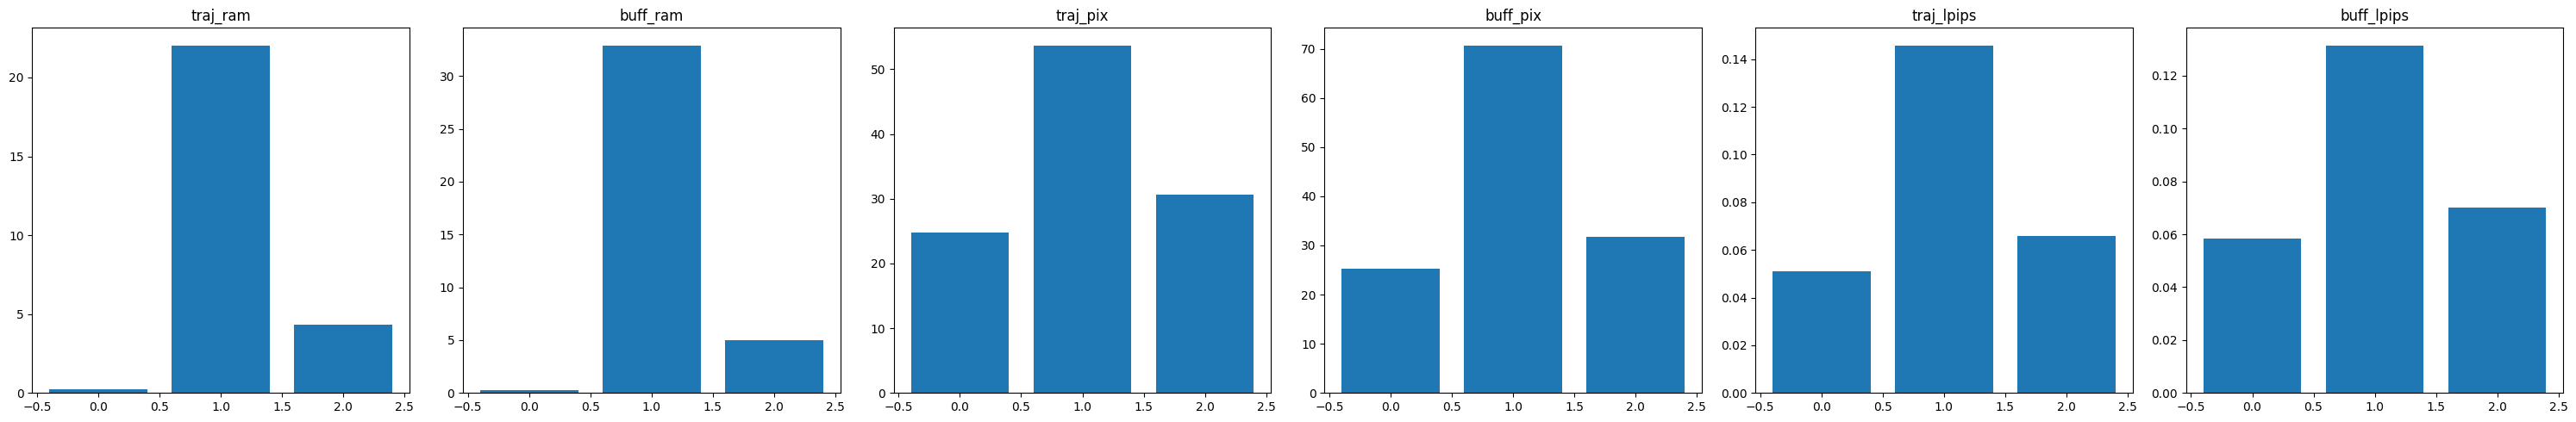

In [38]:
for j, env_id in enumerate(env_ids):
    print(env_id)
    plt.figure(figsize=(30, 5))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        plt.title(['traj_ram', 'buff_ram', 'traj_pix', 'buff_pix', 'traj_lpips', 'buff_lpips'][i])
        plt.bar(np.arange(3), a[j][:, i])
    plt.tight_layout()
    plt.show()
    

In [307]:
import eval_diversity

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


In [273]:
import lpips

In [274]:
loss_fn_alex = lpips.LPIPS(net="alex")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


In [117]:
device = 'cuda'

In [118]:
env_ids = ['MontezumaRevenge']
env_ids = ['Asteroids', 'BankHeist', 'BattleZone', 'BeamRider', 'Berzerk', 'Boxing', 'Breakout', 'Centipede', 'ChopperCommand', 'CrazyClimber', 'Freeway', 'Frostbite', 'Gopher', 'Gravitar', 'Hero', 'Kangaroo', 'Krull', 'KungFuMaster', 'MontezumaRevenge', 'MsPacman', 'Pitfall', 'Pong', 'PrivateEye', 'Qbert', 'RoadRunner', 'Robotank', 'Seaquest', 'Skiing', 'Solaris', 'SpaceInvaders', 'StarGunner', 'TimePilot', 'Tutankham', 'Venture', 'YarsRevenge', 'Zaxxon']
objs = ['ext', 'rnd']

In [119]:
for env_id in tqdm(env_ids):
    print(f'\n{env_id}')
    for obj in objs:
        rms_hist = RunningMeanStd()
        
        data_dir = f'./data/egb-atari/specialist_{env_id}_{obj}_0/'
        for file in os.listdir(data_dir):
            if len(file)<10:
                continue
            agent = utils.create_agent('cnn', 18, 4, load_agent=f'{data_dir}/{file}').to(device)
            env = make_env(env_id, 8, 'ext', device=device)
            buffer = buffers.Buffer(env, 256, device=device)
            buffer.collect(agent, 4)
            rms_hist.update(rearrange(buffer.obss, 'n t c h w -> (n t) c h w'))
        print(f'{obj=}, {rms_hist.var.mean().item():10.5f}')


  0%|                                                                                                                                                                                                                         | 0/36 [00:00<?, ?it/s]


Asteroids
obj='ext',  373.71548



  3%|█████▊                                                                                                                                                                                                           | 1/36 [00:45<26:42, 45.80s/it]

obj='rnd',  755.25311

BankHeist
obj='ext', 1215.29626



  6%|███████████▌                                                                                                                                                                                                     | 2/36 [01:31<26:03, 46.00s/it]

obj='rnd', 2095.76270

BattleZone
obj='ext',  165.37419



  8%|█████████████████▍                                                                                                                                                                                               | 3/36 [02:26<27:25, 49.85s/it]

obj='rnd',  347.45337

BeamRider
obj='ext', 1407.73157



 11%|███████████████████████▏                                                                                                                                                                                         | 4/36 [03:14<26:08, 49.02s/it]

obj='rnd',  971.43225

Berzerk
obj='ext',  335.84930



 14%|█████████████████████████████                                                                                                                                                                                    | 5/36 [04:00<24:49, 48.05s/it]

obj='rnd',  332.17230

Boxing
obj='ext',  156.86079



 17%|██████████████████████████████████▊                                                                                                                                                                              | 6/36 [04:58<25:45, 51.52s/it]

obj='rnd',  220.04764

Breakout
obj='ext',   56.96931



 19%|████████████████████████████████████████▋                                                                                                                                                                        | 7/36 [05:52<25:11, 52.12s/it]

obj='rnd',   44.94527

Centipede
obj='ext',   63.40080



 22%|██████████████████████████████████████████████▍                                                                                                                                                                  | 8/36 [06:43<24:11, 51.83s/it]

obj='rnd',   71.82883

ChopperCommand
obj='ext',   60.95246



 25%|████████████████████████████████████████████████████▎                                                                                                                                                            | 9/36 [07:40<24:08, 53.65s/it]

obj='rnd',   78.27029

CrazyClimber
obj='ext',   55.74406



 28%|█████████████████████████████████████████████████████████▊                                                                                                                                                      | 10/36 [08:29<22:33, 52.05s/it]

obj='rnd',   62.62289

Freeway
obj='ext',   30.32701



 31%|███████████████████████████████████████████████████████████████▌                                                                                                                                                | 11/36 [09:31<23:01, 55.26s/it]

obj='rnd',   30.83066

Frostbite
obj='ext',  455.65948



 33%|█████████████████████████████████████████████████████████████████████▎                                                                                                                                          | 12/36 [10:27<22:05, 55.24s/it]

obj='rnd',  496.19962

Gopher
obj='ext',  167.22186



 36%|███████████████████████████████████████████████████████████████████████████                                                                                                                                     | 13/36 [11:14<20:15, 52.84s/it]

obj='rnd',  170.18082

Gravitar
obj='ext', 1212.73779



 39%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                                               | 14/36 [12:04<19:02, 51.92s/it]

obj='rnd',  907.72339

Hero
obj='ext',  642.39709



 42%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                         | 15/36 [13:04<19:03, 54.46s/it]

obj='rnd',  829.49670

Kangaroo
obj='ext',   36.36848



 44%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 16/36 [13:56<17:54, 53.71s/it]

obj='rnd',   49.24414

Krull
obj='ext',  336.63223



 47%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 17/36 [14:46<16:36, 52.44s/it]

obj='rnd',  327.38330

KungFuMaster
obj='ext',   85.31834



 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                        | 18/36 [15:40<15:53, 52.99s/it]

obj='rnd',  115.56554

MontezumaRevenge
obj='ext',  553.75354



 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                  | 19/36 [16:33<15:02, 53.07s/it]

obj='rnd',  134.07269

MsPacman
obj='ext',   76.11322



 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 20/36 [17:24<13:59, 52.48s/it]

obj='rnd',   74.83006

Pitfall
obj='ext',   68.63295



 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 21/36 [18:16<13:05, 52.36s/it]

obj='rnd',  150.00404

Pong
obj='ext',   18.90127



 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 22/36 [19:04<11:51, 50.83s/it]

obj='rnd',   19.38892

PrivateEye
obj='ext',  361.96414



 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 23/36 [19:59<11:18, 52.20s/it]

obj='rnd',  392.78043

Qbert
obj='ext',  103.84104



 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 24/36 [20:51<10:26, 52.19s/it]

obj='rnd',  102.02851

RoadRunner
obj='ext',  147.78198



 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 25/36 [21:49<09:52, 53.89s/it]

obj='rnd',  170.06461

Robotank
obj='ext',  192.28549



 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 26/36 [22:50<09:20, 56.04s/it]

obj='rnd', 1035.56714

Seaquest
obj='ext',   82.43946



 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 27/36 [23:43<08:15, 55.04s/it]

obj='rnd',   92.02782

Skiing


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 27/36 [23:43<07:54, 52.72s/it]


RuntimeError: Error(s) in loading state_dict for NatureCNNAgent:
	size mismatch for actor.weight: copying a param with shape torch.Size([9, 512]) from checkpoint, the shape in current model is torch.Size([18, 512]).
	size mismatch for actor.bias: copying a param with shape torch.Size([9]) from checkpoint, the shape in current model is torch.Size([18]).

In [120]:
file

'agent_000000000.pt'

In [123]:
utils.create_agent('cnn', 18, 4, load_agent=f'{data_dir}/{file}').to(device)

RuntimeError: Error(s) in loading state_dict for NatureCNNAgent:
	size mismatch for actor.weight: copying a param with shape torch.Size([9, 512]) from checkpoint, the shape in current model is torch.Size([18, 512]).
	size mismatch for actor.bias: copying a param with shape torch.Size([9]) from checkpoint, the shape in current model is torch.Size([18]).

In [125]:
a = torch.load(data_dir+file)

In [131]:
for k, v in a.items():
    print(k, v.shape)

encode_obs.network.0.weight torch.Size([32, 4, 8, 8])
encode_obs.network.0.bias torch.Size([32])
encode_obs.network.2.weight torch.Size([64, 32, 4, 4])
encode_obs.network.2.bias torch.Size([64])
encode_obs.network.4.weight torch.Size([64, 64, 3, 3])
encode_obs.network.4.bias torch.Size([64])
encode_obs.network.7.weight torch.Size([512, 3136])
encode_obs.network.7.bias torch.Size([512])
actor.weight torch.Size([9, 512])
actor.bias torch.Size([9])
critic.weight torch.Size([1, 512])
critic.bias torch.Size([1])


In [148]:
env.action_space

Discrete(9)

In [152]:
lines = open('atari_games_104.txt').readlines()
env_ids = [line.strip() for line in lines]

In [153]:
for env_id in env_ids:
    env = envpool.make_gymnasium(env_id+'-v5', full_action_space=True)
    print(env.action_space.n, env_id)

18 Adventure
18 AirRaid
18 Alien
18 Amidar
18 Assault
18 Asterix
18 Asteroids
18 Atlantis
18 Atlantis2
18 Backgammon
18 BankHeist
18 BasicMath
18 BattleZone
18 BeamRider
18 Berzerk
18 Blackjack
18 Bowling
18 Boxing
18 Breakout
18 Carnival
18 Casino
18 Centipede
18 ChopperCommand
18 CrazyClimber
18 Crossbow
18 Darkchambers
18 Defender
18 DemonAttack
18 DonkeyKong
18 DoubleDunk
18 Earthworld
18 ElevatorAction
18 Enduro
18 Entombed
18 Et
18 FishingDerby
18 FlagCapture
18 Freeway
18 Frogger
18 Frostbite
18 Galaxian
18 Gopher
18 Gravitar
18 Hangman
18 HauntedHouse
18 Hero
18 HumanCannonball
18 IceHockey
18 Jamesbond
18 JourneyEscape
18 Kaboom
18 Kangaroo
18 KeystoneKapers
18 KingKong
18 Klax
18 Koolaid
18 Krull
18 KungFuMaster
18 LaserGates
9 LostLuggage
18 MarioBros
18 MiniatureGolf
18 MontezumaRevenge
18 MrDo
18 MsPacman
18 NameThisGame
18 Othello
18 Pacman
18 Phoenix
18 Pitfall
18 Pitfall2
18 Pong
18 Pooyan
18 PrivateEye
18 Qbert
18 Riverraid
18 RoadRunner
18 Robotank
18 Seaquest
18 SirL

In [160]:
gym.make('ALE/WizardOfWor-v5', full_action_space=True).action_space.n

18